<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/14_tabular_ctgan_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Install SDV
!pip install -q sdv

In [4]:
# Step 2: Import libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

In [5]:
# Step 3: Load breast cancer dataset as tabular data
data = load_breast_cancer(as_frame=True)
df = data.frame
print("Original Data Shape:", df.shape)

Original Data Shape: (569, 31)


In [6]:
# Step 4: Split to train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
# Step 5: Generate metadata automatically
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(train_df)

In [8]:
# Step 6: Train the CTGAN Synthesizer
synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(train_df)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [9]:
# Step 7: Sample synthetic data
synthetic_df = synthesizer.sample(num_rows=len(train_df))
print("Synthetic Data Shape:", synthetic_df.shape)

Synthetic Data Shape: (455, 31)


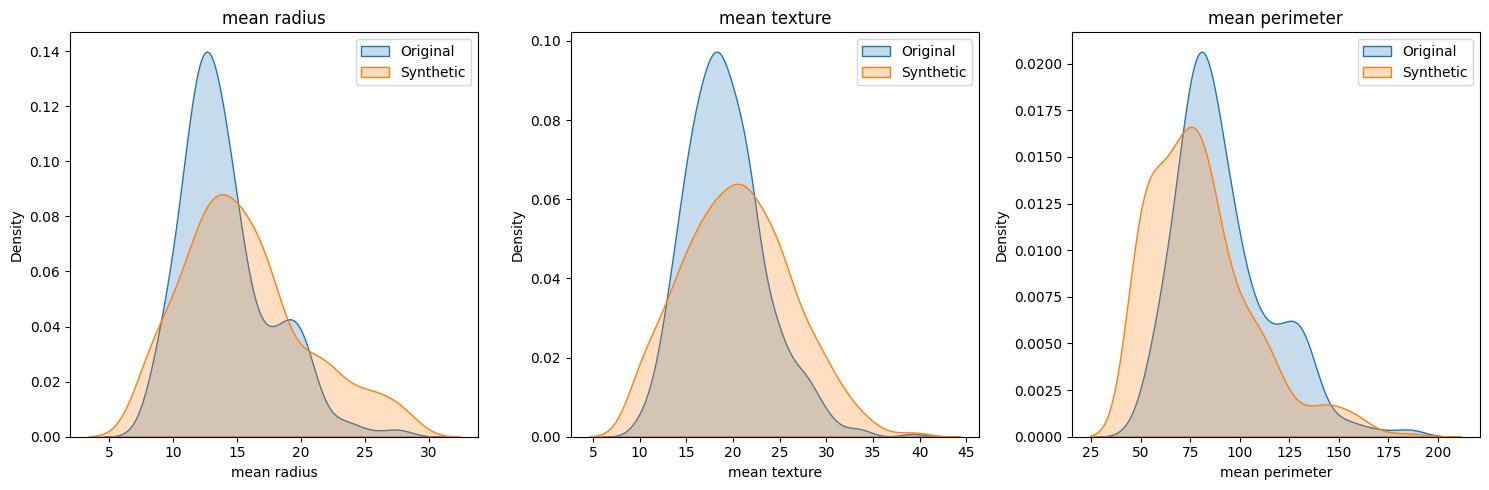

In [10]:
# Step 8: Compare distributions for selected features
plt.figure(figsize=(15, 5))
for i, col in enumerate(['mean radius', 'mean texture', 'mean perimeter']):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(train_df[col], label='Original', fill=True)
    sns.kdeplot(synthetic_df[col], label='Synthetic', fill=True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()